In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Coordonnées des monuments (latitude, longitude)
monuments = {
    "Tour Eiffel": (48.8584, 2.2945),
    "Louvre": (48.8606, 2.3376),
    "Notre-Dame de Paris": (48.853, 2.3499),
    "Arc de Triomphe": (48.8738, 2.295),
}

In [3]:
# Télécharger le graphe de Paris pour les trajets pédestres
G = ox.graph_from_place("Paris, France", network_type="walk")

In [4]:
# Trouver les noeuds du graphe les plus proches des monuments
monument_nodes = []
for name, coords in monuments.items():
    node = ox.distance.nearest_nodes(G, coords[1], coords[0])
    monument_nodes.append(node)

In [5]:
# Calcul de l'itinéraire entre les monuments dans l'ordre
route = []
for i in range(len(monument_nodes) - 1):
    start_node = monument_nodes[i]
    end_node = monument_nodes[i + 1]
    route_segment = nx.shortest_path(G, start_node, end_node, weight="length")
    route.extend(route_segment[:-1])  # Exclure le dernier noeud pour éviter les doublons
route.append(monument_nodes[-1])  # Ajouter le dernier noeud


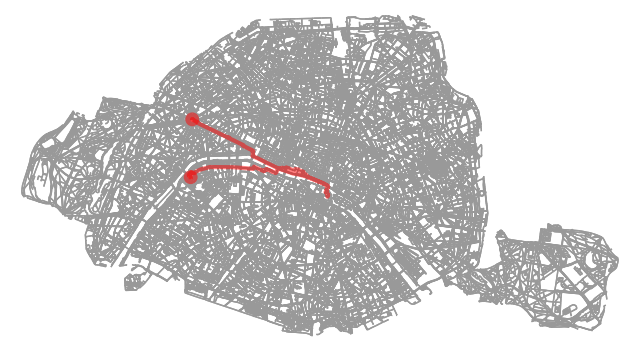

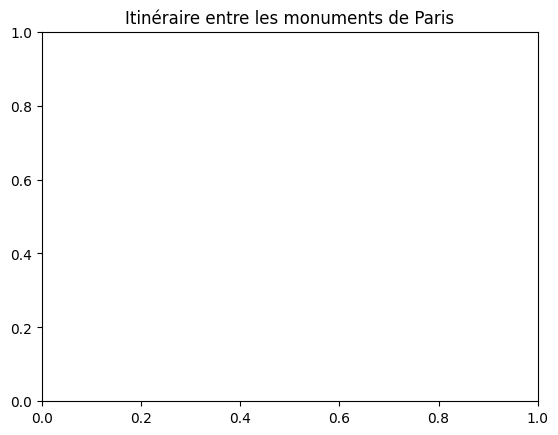

In [9]:
# Affichage de l'itinéraire sur une carte
fig, ax = ox.plot_graph_route(G, route, route_linewidth=3, node_size=0, bgcolor="w", show=True)
plt.title("Itinéraire entre les monuments de Paris")
plt.show()